# Tarefa 02

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

In [23]:
from pandas_datareader import data as web

import plotly.express as px
import plotly.graph_objects as go
from plotly import graph_objects

import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt

#### 1. Carregue os dados da tarefa anterior

In [7]:
aapl = pd.read_csv(r"C:\Users\cepir\Documents\Henrique\EBAC\AAPL_dados.csv")
msft = pd.read_csv(r"C:\Users\cepir\Documents\Henrique\EBAC\MSFT_dados.csv")
tsla = pd.read_csv(r"C:\Users\cepir\Documents\Henrique\EBAC\TSLA_dados.csv")

#### 2. Média móvel

1. Faça uma média móvel  em 90 dias dos valores de fechamento ajustados dos ativos que você escolheu
2. Utilizando a função ```rolling()```, calcule o desvio pardão desses ativos ao longo do tempo, utilizando a mesma janela móvel do item acima
2. Monte um gráfico de linhas para as médias móveis dos ativos da sua base
4. Monte um gráfico de linhas para os desvios padrão em janela móvel
5. Compare os dois gráficos que você fez com o da tarefa anterior. Veja se eles apontam conclusões semelhantes quanto aos períodos de maior volatilidade (variação) dos ativos.

In [14]:
# 1.
aapl['Close'] = pd.to_numeric(aapl['Close'], errors='coerce')
msft['Close'] = pd.to_numeric(msft['Close'], errors='coerce')
tsla['Close'] = pd.to_numeric(tsla['Close'], errors='coerce')

aapl['MA_90'] = aapl['Close'].rolling(window=90).mean()
msft['MA_90'] = msft['Close'].rolling(window=90).mean()
tsla['MA_90'] = tsla['Close'].rolling(window=90).mean()

In [16]:
# 2.
aapl['STD_90'] = aapl['Close'].rolling(window=90).std()
msft['STD_90'] = msft['Close'].rolling(window=90).std()
tsla['STD_90'] = tsla['Close'].rolling(window=90).std()

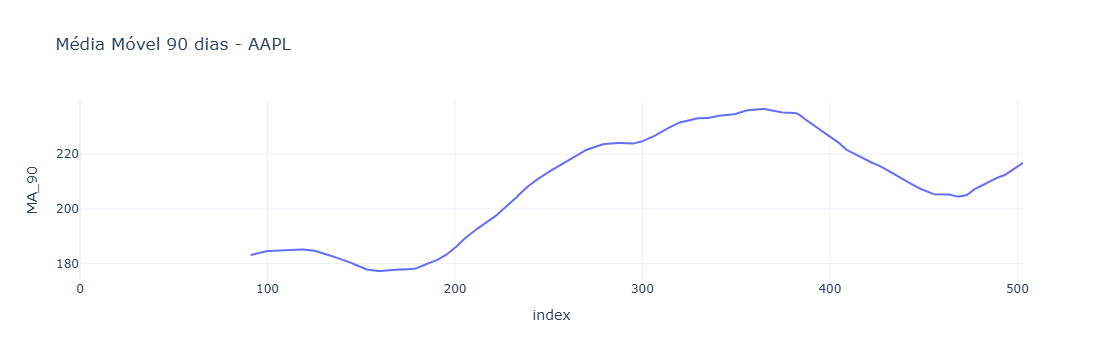

In [18]:
# 3.
fig_ma = px.line(aapl,
                 x=aapl.index,
                 y='MA_90',
                 title='Média Móvel 90 dias - AAPL',
                 template='plotly_white'
)

fig_ma.show()

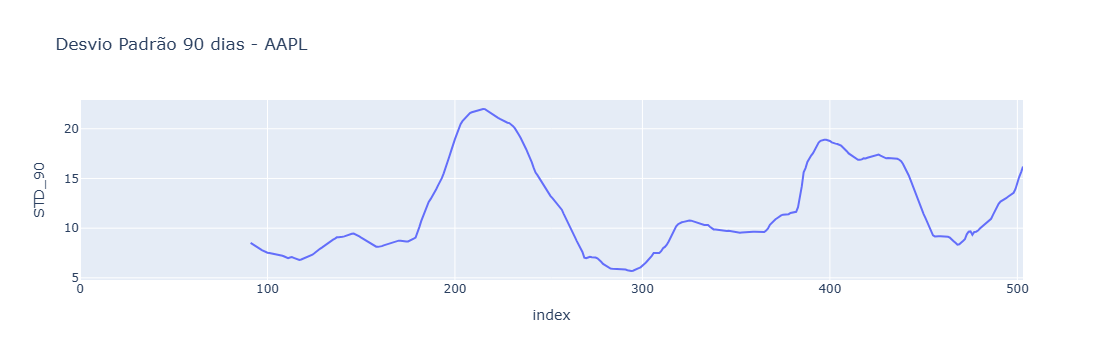

In [19]:
# 4.
fig_std = px.line(aapl,
                  x=aapl.index,
                  y='STD_90',
                  title='Desvio Padrão 90 dias - AAPL',
)

fig_std.show()

In [20]:
# 5.

#### 3. Gráfico de *candlestick*
1. Selecione o período dos últimos 60 dias (corridos) para um dos ativos da sua base
2. Monte um gráfico de *candlestick* para esses dados.

In [21]:
# 1.
aapl_60 = aapl.tail(60)

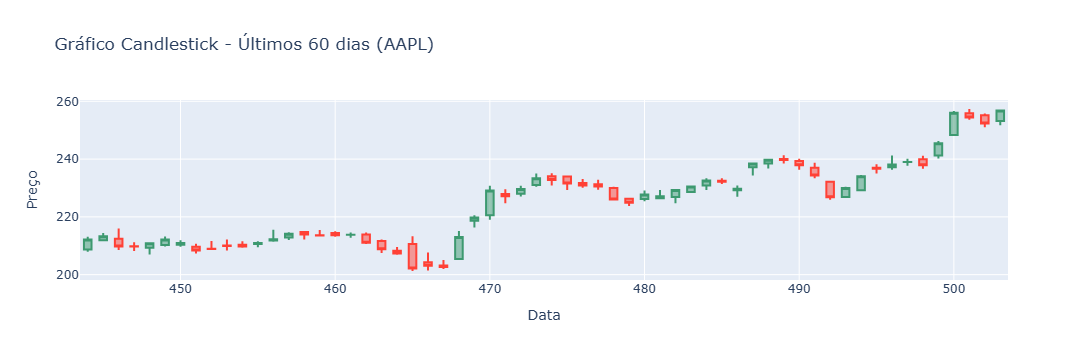

In [24]:
# 2.
fig = go.Figure(data=[go.Candlestick(
    x=aapl_60.index,
    open=aapl_60['Open'],
    high=aapl_60['High'],
    low=aapl_60['Low'],
    close=aapl_60['Close']
)])

fig.update_layout(
    title='Gráfico Candlestick - Últimos 60 dias (AAPL)',
    xaxis_title='Data',
    yaxis_title='Preço',
    xaxis_rangeslider_visible=False
)

fig.show()